# 机器学习纳米学位
## 毕业设计

----
## 一、项目概述

### 1.1 声音性别识别

数据集来源于kaggle上的一个数据竞赛，这个数据集包含3168个样本，其中50%为男性，50%为女性。数据是已经经过处理的声音信息，包括声音的各种信息的统计量。

### 1.2 问题说明

使用机器学习的方法判断一段音频信号是男性还是女性。

----
## 二、 输入数据

### 2.1 声音特征预览

In [1]:
# 检查你的Python版本
from sys import version_info
if version_info.major != 2 and version_info.minor != 7:
    raise Exception('请使用Python 2.7来完成此项目')

In [22]:
# 为这个项目导入需要的库
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()
import seaborn as sns

# 导入附加的可视化代码visuals.py
import visuals as vs

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# 导入人口普查数据
data = pd.read_csv("voice.csv")

# 成功 - 显示第一条记录
display(data.head(n=1))

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.0,0.0,male


总共包涵21个声音特征。

### 2.2、数量总览
对数据集进行一个粗略的探索，看看有多少声音来自于男生，多少声音来自于女声。

In [3]:
# TODO：总的记录数
n_records = data.shape[0]

# TODO：被调查者的收入大于$50,000的人数
male_amount = data[data.label == 'male'].shape[0]

# TODO：被调查者的收入最多为$50,000的人数
female_amount = data[data.label == 'female'].shape[0]

# TODO：被调查者收入大于$50,000所占的比例
male_percent =100* float(male_amount)/n_records

# 打印结果
print "Total number of records: {}".format(n_records)
print "male amount: {}".format(male_amount)
print "female amount0: {}".format(female_amount)
print "Percentage of male: {:.2f}%".format(male_percent)

Total number of records: 3168
male amount: 1584
female amount0: 1584
Percentage of male: 50.00%


### 获得特征和标签
`label` 列作为标签列单独存放。

In [4]:
# 将数据切分成特征和对应的标签
label_raw = data['label']
features_raw = data.drop('label', axis = 1)

## 极端值分析

In [20]:
result = {}
# 对于每一个特征，找到值异常高或者是异常低的数据点
for feature in features_raw.keys():
    
    # TODO：计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(features_raw[feature], 25)
    
    # TODO：计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(features_raw[feature], 75)
    
    # TODO：使用四分位范围计算异常阶（3倍的四分位距）分析极度异常
    step = 3 * (Q3-Q1)
    
    # 显示异常点
    print "Data points considered outliers for the feature '{}':".format(feature)
    for ix, item in features_raw[~((features_raw[feature] >= Q1 - step) & (features_raw[feature] <= Q3 + step))].iterrows():
        if result.has_key(ix):
            result[ix] += 1
        else:
            result[ix] = 1
    display(features_raw[~((features_raw[feature] >= Q1 - step) & (features_raw[feature] <= Q3 + step))])
    
# 可选：选择你希望移除的数据点的索引
outliers  = []
for k, v in result.items():
    if v > 2:
        outliers.append(k)
print result
print outliers

Data points considered outliers for the feature 'meanfreq':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
291,0.048254,0.070167,0.015790,0.008229,0.058268,0.050040,3.289199,12.906251,0.830441,0.300592,0.060048,0.048254,0.100127,0.016719,0.275862,0.183364,0.007812,4.882812,4.875000,0.069912
454,0.039363,0.060447,0.013588,0.005581,0.042946,0.037366,4.593055,27.934091,0.817450,0.282282,0.000728,0.039363,0.101011,0.016048,0.246154,0.256104,0.007812,3.242188,3.234375,0.139629


Data points considered outliers for the feature 'sd':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'median':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
290,0.075701,0.089599,0.029361,0.002402,0.139066,0.136663,11.669905,166.260441,0.812499,0.411128,0.000801,0.075701,0.106944,0.016194,0.262295,0.105873,0.007812,1.484375,1.476562,0.119803
291,0.048254,0.070167,0.015790,0.008229,0.058268,0.050040,3.289199,12.906251,0.830441,0.300592,0.060048,0.048254,0.100127,0.016719,0.275862,0.183364,0.007812,4.882812,4.875000,0.069912
292,0.059645,0.072837,0.026995,0.008378,0.075957,0.067580,5.638914,43.954147,0.872789,0.418733,0.001303,0.059645,0.104004,0.015779,0.266667,0.246761,0.007812,5.070312,5.062500,0.087423
294,0.062182,0.087889,0.010975,0.001780,0.117458,0.115678,9.612208,114.803501,0.786650,0.329570,0.000890,0.062182,0.099776,0.017112,0.258065,0.095553,0.007812,1.414062,1.406250,0.105778
295,0.080571,0.091954,0.029364,0.005339,0.148305,0.142966,6.824624,58.038903,0.849853,0.438149,0.000890,0.080571,0.092098,0.015748,0.250000,0.030950,0.007812,0.328125,0.320312,0.101463
296,0.079369,0.088650,0.040976,0.002119,0.143650,0.141531,9.013217,92.766695,0.834213,0.450205,0.001413,0.079369,0.095733,0.016194,0.250000,0.232718,0.007812,6.320312,6.312500,0.065555
454,0.039363,0.060447,0.013588,0.005581,0.042946,0.037366,4.593055,27.934091,0.817450,0.282282,0.000728,0.039363,0.101011,0.016048,0.246154,0.256104,0.007812,3.242188,3.234375,0.139629


Data points considered outliers for the feature 'Q25':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'Q75':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
291,0.048254,0.070167,0.015790,0.008229,0.058268,0.050040,3.289199,12.906251,0.830441,0.300592,0.060048,0.048254,0.100127,0.016719,0.275862,0.183364,0.007812,4.882812,4.875000,0.069912
292,0.059645,0.072837,0.026995,0.008378,0.075957,0.067580,5.638914,43.954147,0.872789,0.418733,0.001303,0.059645,0.104004,0.015779,0.266667,0.246761,0.007812,5.070312,5.062500,0.087423
454,0.039363,0.060447,0.013588,0.005581,0.042946,0.037366,4.593055,27.934091,0.817450,0.282282,0.000728,0.039363,0.101011,0.016048,0.246154,0.256104,0.007812,3.242188,3.234375,0.139629


Data points considered outliers for the feature 'IQR':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'skew':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
83,0.191311,0.057123,0.208775,0.139673,0.235239,0.095566,6.995045,112.647988,0.907622,0.319069,0.090012,0.191311,0.080595,0.015717,0.225352,0.160572,0.093750,0.429688,0.335938,0.142063
87,0.194921,0.056285,0.208430,0.148161,0.242332,0.094170,6.983667,116.959309,0.924099,0.314006,0.090090,0.194921,0.063475,0.015671,0.219178,0.147959,0.093750,0.367188,0.273438,0.098810
93,0.117778,0.079528,0.111176,0.046735,0.196824,0.150088,23.538061,671.834241,0.901914,0.562834,0.000000,0.117778,0.091147,0.015640,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
94,0.105782,0.081247,0.102789,0.022764,0.188243,0.165478,27.952901,903.789086,0.893300,0.553553,0.000000,0.105782,0.087918,0.016129,0.266667,0.007812,0.007812,0.007812,0.000000,0.000000
95,0.107009,0.081313,0.102788,0.025164,0.188941,0.163778,24.705118,714.696895,0.891348,0.576778,0.000000,0.107009,0.075907,0.016000,0.222222,0.007812,0.007812,0.007812,0.000000,0.000000
96,0.119006,0.083083,0.106214,0.045520,0.200087,0.154566,26.879675,812.204086,0.883926,0.604149,0.000000,0.119006,0.092961,0.016360,0.175824,0.007812,0.007812,0.007812,0.000000,0.000000
97,0.082526,0.080918,0.061245,0.008307,0.129657,0.121350,15.891002,402.932610,0.906001,0.561684,0.000000,0.082526,0.087384,0.015810,0.271186,0.007979,0.007812,0.015625,0.007812,0.043478


Data points considered outliers for the feature 'kurt':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
15,0.174272,0.069411,0.190874,0.115602,0.228279,0.112677,4.485038,61.764908,0.950972,0.635199,0.050027,0.174272,0.102046,0.018328,0.246154,1.621299,0.007812,7.000000,6.992188,0.209311
24,0.160422,0.076615,0.144824,0.120924,0.237244,0.116319,6.253208,85.491926,0.933030,0.567424,0.060078,0.160422,0.098944,0.016097,0.275862,0.206756,0.007812,3.953125,3.945312,0.073890
25,0.164700,0.075362,0.147018,0.118698,0.240475,0.121777,4.208608,43.681885,0.940669,0.604020,0.059965,0.164700,0.082963,0.015640,0.253968,0.143353,0.007812,1.062500,1.054688,0.125926
26,0.169579,0.075635,0.186468,0.116706,0.238549,0.121843,4.269923,45.895248,0.929498,0.543709,0.059966,0.169579,0.082451,0.016211,0.271186,0.148438,0.007812,3.609375,3.601562,0.050841
83,0.191311,0.057123,0.208775,0.139673,0.235239,0.095566,6.995045,112.647988,0.907622,0.319069,0.090012,0.191311,0.080595,0.015717,0.225352,0.160572,0.093750,0.429688,0.335938,0.142063
84,0.196006,0.053930,0.203384,0.154049,0.239323,0.085274,4.038263,50.591462,0.927145,0.296277,0.090012,0.196006,0.081017,0.015810,0.195122,0.147274,0.093750,0.375000,0.281250,0.176329
85,0.191462,0.051862,0.202495,0.153190,0.228694,0.075504,4.196510,45.864161,0.912414,0.284872,0.090058,0.191462,0.065827,0.016244,0.210526,0.167783,0.093750,0.656250,0.562500,0.105691


Data points considered outliers for the feature 'sp.ent':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'sfm':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'mode':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'centroid':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
291,0.048254,0.070167,0.015790,0.008229,0.058268,0.050040,3.289199,12.906251,0.830441,0.300592,0.060048,0.048254,0.100127,0.016719,0.275862,0.183364,0.007812,4.882812,4.875000,0.069912
454,0.039363,0.060447,0.013588,0.005581,0.042946,0.037366,4.593055,27.934091,0.817450,0.282282,0.000728,0.039363,0.101011,0.016048,0.246154,0.256104,0.007812,3.242188,3.234375,0.139629


Data points considered outliers for the feature 'meanfun':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'minfun':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1652,0.132477,0.087524,0.141808,0.043653,0.215424,0.171771,1.185599,4.716940,0.978482,0.842936,0.241771,0.132477,0.214127,0.168421,0.262295,0.338405,0.015625,0.789062,0.773438,0.333333
1776,0.179855,0.038917,0.185143,0.172000,0.196571,0.024571,3.050910,13.052365,0.820681,0.302646,0.189143,0.179855,0.178143,0.158416,0.200000,0.184659,0.164062,0.203125,0.039062,0.220000
1782,0.174633,0.034746,0.173753,0.164010,0.183264,0.019254,3.825210,19.691720,0.825177,0.258850,0.167490,0.174633,0.174703,0.146789,0.271186,0.681452,0.156250,6.195312,6.039062,0.164812
1813,0.184889,0.032249,0.182729,0.167764,0.202025,0.034262,2.407879,8.507610,0.833188,0.209671,0.168158,0.184889,0.179046,0.153846,0.225352,0.557726,0.156250,6.351562,6.195312,0.128403
2254,0.114828,0.084428,0.088618,0.044042,0.179905,0.135863,1.021112,3.811971,0.969638,0.774734,0.022421,0.114828,0.191768,0.160000,0.275862,0.556526,0.023438,5.101562,5.078125,0.155865
3019,0.193889,0.041656,0.197947,0.192086,0.206644,0.014558,4.384211,24.550439,0.817760,0.266519,0.196435,0.193889,0.195991,0.185185,0.212766,0.549423,0.205078,0.786133,0.581055,0.660924
3021,0.207916,0.043256,0.215012,0.204654,0.229881,0.025227,3.127991,13.001145,0.835735,0.259570,0.204487,0.207916,0.216266,0.200000,0.238095,0.455367,0.205078,0.849609,0.644531,0.541982
3027,0.184984,0.039844,0.184730,0.180083,0.195574,0.015491,5.838121,43.814325,0.812469,0.283567,0.180664,0.184984,0.185932,0.178571,0.277778,0.419312,0.180664,0.766602,0.585938,0.647727
3041,0.212271,0.037770,0.215640,0.206848,0.227749,0.020900,3.713131,18.896275,0.821883,0.204368,0.215474,0.212271,0.218888,0.200000,0.277778,0.400578,0.209961,0.839844,0.629883,0.344257
3050,0.223724,0.052217,0.235455,0.216364,0.252703,0.036340,2.400245,9.378721,0.862333,0.274871,0.217871,0.223724,0.237636,0.204082,0.277778,0.479455,0.004883,0.781250,0.776367,0.502859


Data points considered outliers for the feature 'maxfun':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937
10,0.157021,0.071943,0.168160,0.101430,0.216740,0.115310,0.979442,3.974223,0.965249,0.733693,0.096358,0.157021,0.088894,0.022069,0.117647,0.460227,0.007812,2.812500,2.804688,0.200000
29,0.180528,0.070867,0.142385,0.129541,0.252477,0.122936,2.799969,12.190361,0.853115,0.313426,0.133578,0.180528,0.126607,0.017039,0.177778,0.234863,0.007812,0.507812,0.500000,0.329241
35,0.159530,0.075273,0.146853,0.121399,0.239371,0.117972,1.993501,6.870351,0.921132,0.582531,0.133636,0.159530,0.120254,0.018412,0.168421,0.372869,0.007812,2.609375,2.601562,0.216817
37,0.172436,0.071505,0.145620,0.132847,0.252409,0.119562,4.504441,31.078417,0.878207,0.470044,0.135912,0.172436,0.138904,0.121212,0.172043,0.260937,0.132812,0.554688,0.421875,0.232510
38,0.162981,0.065952,0.142771,0.134296,0.206985,0.072689,4.344838,26.589605,0.869836,0.429786,0.137555,0.162981,0.131376,0.016771,0.181818,0.187891,0.007812,0.687500,0.679688,0.255428
49,0.137893,0.072421,0.119852,0.086531,0.200701,0.114170,2.010993,10.262074,0.963294,0.727047,0.059926,0.137893,0.076307,0.016211,0.128000,0.505859,0.031250,4.664062,4.632812,0.173037
91,0.198778,0.056755,0.210616,0.159707,0.241613,0.081906,6.230335,85.996792,0.905979,0.307965,0.090117,0.198778,0.072136,0.017897,0.150943,0.145559,0.093750,0.421875,0.328125,0.126770
96,0.119006,0.083083,0.106214,0.045520,0.200087,0.154566,26.879675,812.204086,0.883926,0.604149,0.000000,0.119006,0.092961,0.016360,0.175824,0.007812,0.007812,0.007812,0.000000,0.000000
107,0.177428,0.067855,0.163195,0.121223,0.246312,0.125089,1.858877,6.621258,0.923322,0.462385,0.130888,0.177428,0.111032,0.017660,0.160000,0.241508,0.007812,2.578125,2.570312,0.105554


Data points considered outliers for the feature 'meandom':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx


Data points considered outliers for the feature 'mindom':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
210,0.149192,0.083125,0.153563,0.083155,0.215966,0.132811,2.491131,13.636389,0.962901,0.738547,0.015267,0.149192,0.121152,0.016194,0.253968,1.591734,0.343750,5.007812,4.664062,0.308270
316,0.157601,0.061523,0.155399,0.103868,0.206930,0.103063,2.080085,7.696512,0.933424,0.549759,0.200086,0.157601,0.109531,0.014205,0.243902,1.152981,0.458984,3.969727,3.510742,0.361348
934,0.193832,0.058964,0.227988,0.124396,0.240557,0.116161,2.884966,12.561528,0.856161,0.259824,0.117461,0.193832,0.115723,0.048731,0.279070,2.141113,0.351562,15.679688,15.328125,0.110022
2795,0.188687,0.042357,0.179200,0.162193,0.215289,0.053096,2.640277,11.259316,0.873810,0.296574,0.168000,0.188687,0.156115,0.047151,0.279070,1.645312,0.281250,9.398438,9.117188,0.107519
2968,0.174173,0.065184,0.158520,0.140672,0.230679,0.090007,2.915623,14.497053,0.935187,0.584647,0.151035,0.174173,0.135855,0.026810,0.263158,1.246280,0.449219,3.940430,3.491211,0.281119
3002,0.172730,0.063846,0.167576,0.140354,0.222904,0.082551,2.148557,8.959010,0.942914,0.605475,0.145657,0.172730,0.152389,0.026042,0.256410,1.076416,0.400391,1.752930,1.352539,0.345969


Data points considered outliers for the feature 'maxdom':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1114,0.175311,0.068150,0.160749,0.127551,0.241997,0.114446,1.438899,4.568239,0.939701,0.599018,0.148955,0.175311,0.133196,0.047105,0.271186,1.479992,0.023438,21.867188,21.843750,0.074511
1448,0.178261,0.062283,0.179499,0.138831,0.233255,0.094424,1.464983,5.498037,0.925515,0.460198,0.179967,0.178261,0.128866,0.050580,0.277457,1.635298,0.023438,21.843750,21.820312,0.053843


Data points considered outliers for the feature 'dfrange':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1114,0.175311,0.06815,0.160749,0.127551,0.241997,0.114446,1.438899,4.568239,0.939701,0.599018,0.148955,0.175311,0.133196,0.047105,0.271186,1.479992,0.023438,21.867188,21.84375,0.074511


Data points considered outliers for the feature 'modindx':


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
314,0.152651,0.061781,0.155019,0.099145,0.202491,0.103346,2.686370,10.969688,0.913229,0.507183,0.101245,0.152651,0.093290,0.047847,0.156250,0.449219,0.078125,0.644531,0.566406,0.609914
328,0.160862,0.060496,0.179161,0.105538,0.209706,0.104168,3.780401,20.565883,0.884453,0.424228,0.103385,0.160862,0.109946,0.100000,0.277778,0.366676,0.107422,0.649414,0.541992,0.543190
330,0.154637,0.060654,0.164264,0.100706,0.202485,0.101779,3.455839,16.283380,0.895792,0.471312,0.197117,0.154637,0.102158,0.084034,0.181818,0.413876,0.097656,0.610352,0.512695,0.633584
449,0.177096,0.060335,0.183380,0.132113,0.220845,0.088732,0.891425,3.172848,0.940106,0.585042,0.205728,0.177096,0.109495,0.015826,0.166667,0.367188,0.156250,0.664062,0.507812,0.780769
672,0.152186,0.063314,0.156973,0.096143,0.201855,0.105712,3.063665,13.483005,0.893313,0.424896,0.089992,0.152186,0.097133,0.038760,0.263158,0.511068,0.092773,0.751953,0.659180,0.684444
673,0.152267,0.063457,0.150837,0.096325,0.196591,0.100266,3.087689,13.698311,0.885277,0.398488,0.093917,0.152267,0.095382,0.040816,0.163934,0.560192,0.097656,0.844727,0.747070,0.597261
674,0.149791,0.061140,0.147068,0.097362,0.197003,0.099642,3.744220,19.764387,0.883207,0.416030,0.093485,0.149791,0.102147,0.069930,0.250000,0.466890,0.004883,0.844727,0.839844,0.817442
677,0.149948,0.060130,0.133173,0.097362,0.195396,0.098034,3.171549,15.618431,0.897885,0.418336,0.094900,0.149948,0.094895,0.050505,0.129870,0.313895,0.097656,0.756836,0.659180,0.569259
679,0.159321,0.063010,0.181556,0.098646,0.198300,0.099654,2.853819,12.155037,0.867335,0.315548,0.098847,0.159321,0.100271,0.039841,0.270270,0.480143,0.097656,0.839844,0.742188,0.539188
680,0.156240,0.063787,0.172761,0.095881,0.194602,0.098721,2.931277,13.608140,0.888509,0.377501,0.091950,0.156240,0.098263,0.042735,0.217391,0.425914,0.029297,0.791016,0.761719,0.854701


{0: 4, 1: 4, 2: 3, 7: 1, 10: 1, 15: 1, 2069: 1, 2071: 1, 24: 1, 25: 1, 26: 1, 2075: 1, 29: 1, 35: 1, 37: 1, 38: 1, 49: 1, 83: 2, 84: 1, 85: 1, 86: 1, 87: 2, 88: 1, 89: 1, 91: 2, 93: 2, 94: 2, 95: 2, 96: 3, 97: 2, 98: 2, 99: 2, 100: 2, 101: 2, 102: 2, 107: 1, 109: 1, 110: 1, 113: 1, 114: 3, 115: 2, 116: 2, 117: 2, 118: 2, 119: 2, 120: 2, 121: 2, 122: 2, 123: 2, 124: 2, 125: 2, 126: 2, 127: 2, 128: 2, 129: 2, 145: 2, 146: 2, 147: 2, 149: 2, 150: 2, 151: 2, 152: 2, 153: 2, 154: 2, 155: 2, 156: 2, 157: 2, 158: 2, 159: 2, 160: 2, 161: 2, 162: 2, 163: 2, 164: 2, 169: 1, 196: 1, 2254: 1, 210: 1, 215: 1, 218: 1, 231: 1, 236: 1, 246: 2, 247: 2, 248: 2, 249: 2, 250: 2, 251: 2, 252: 2, 253: 2, 254: 2, 255: 2, 276: 1, 277: 1, 278: 2, 279: 1, 280: 2, 281: 2, 282: 2, 283: 1, 284: 2, 285: 2, 290: 3, 291: 4, 292: 3, 293: 2, 294: 3, 295: 3, 296: 3, 297: 2, 314: 2, 316: 1, 321: 1, 322: 1, 323: 1, 328: 1, 330: 2, 338: 1, 339: 1, 345: 1, 355: 1, 362: 2, 363: 1, 373: 1, 374: 1, 375: 1, 379: 1, 380: 1, 383:

### 2.3、探索数据分布

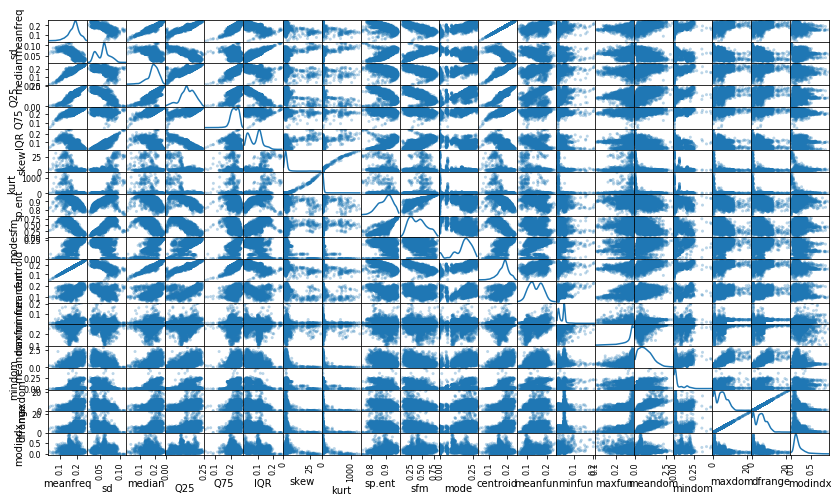

In [5]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.plotting.scatter_matrix(features_raw, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

## 相关性分析

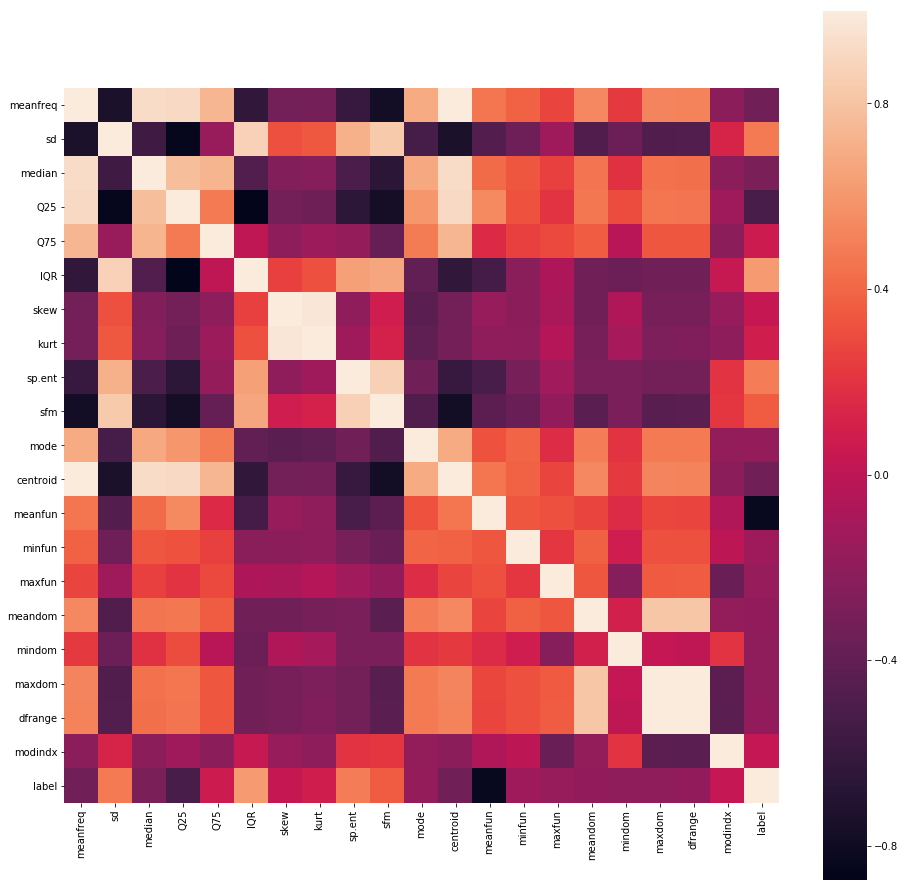

In [29]:
import matplotlib.pyplot as plt

data = data.replace({"male":1, "female":0})
hitmap_data = data.corr()
f, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(hitmap_data, vmax=1, square=True)
plt.show()

# hitmapData = data.corr()
# f, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(hitmapData, vmax=1, square=True)
# plt.show()
# hitmap_dict = hitmapData['Survived'].to_dict()
# del hitmap_dict['Survived']
# print("List the numerical features decendingly by their correlation with Sale Price:\n")
# for ele in sorted(hitmap_dict.items(), key = lambda x: -abs(x[1])):

----
## 三、准备数据


### 3.1 数据预处理
 - 将目标标签`'label'`转换成数字项。
   - 将"male"转换成`1`；将"female"转换成`0`。

In [6]:
# TODO：将'lable_raw'编码成数字值
label = label_raw.replace({"male":1, "female":0})
features = features_raw

### 3.2 混洗和切分数据
现在所有的 _类别变量_ 已被转换成数值特征，而且所有的数值特征已被规一化。和我们一般情况下做的一样，现在将数据（包括特征和它们的标签）切分成训练和测试集。其中80%的数据将用于训练和20%的数据用于测试。然后再进一步把训练数据分为训练集和验证集，用来选择和优化模型。

In [7]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0,
                                                    stratify = label)
# 将'X_train'和'y_train'进一步切分为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0,
                                                    stratify = y_train)

# 显示切分的结果
print "Training set has {} samples.".format(X_train.shape[0])
print "Validation set has {} samples.".format(X_val.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 2027 samples.
Validation set has 507 samples.
Testing set has 634 samples.


----
## 四、训练模型
在这一部分中，本文将尝试四种不同的算法，并确定哪一个能够最好地建模数据。
- 随机森林 (Random Forest)
- 支撑向量机 (SVM)
- Logistic回归（LogisticRegression）
- 深度神经网络（DNN）

### 4.1 创建一个训练和预测的流水线
在下面的代码单元实现以下功能：

 - 从[`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)中导入`fbeta_score`和`accuracy_score`。
 - 用训练集拟合学习器，并记录训练时间。
 - 对训练集的前300个数据点和验证集进行预测并记录预测时间。
 - 计算预测训练集的前300个数据点的准确率和F-score。
 - 计算预测验证集的准确率和F-score。

In [8]:
# TODO：从sklearn中导入两个评价指标 - fbeta_score和accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score
from sklearn import preprocessing

def train_predict(learner, sample_size, X_train, y_train, X_val, y_val): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_val: features validation set
       - y_val: income validation set
    '''
    
    # 如果不是RF模型则对训练数据进行0-1标准化
    if learner.__class__.__name__ != "RandomForestClassifier":
        X_train = preprocessing.MinMaxScaler().fit_transform(X_train)
        X_val = preprocessing.MinMaxScaler().fit_transform(X_val)
    
    results = {}
    
    # TODO：使用sample_size大小的训练数据来拟合学习器
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # 获得程序开始时间
    
    learner.fit(X_train[0: sample_size], y_train[0: sample_size])
    end = time() # 获得程序结束时间
    
    # TODO：计算训练时间
    results['train_time'] = end - start
    
    # TODO: 得到在验证集上的预测值
    #       然后得到对前300个训练数据的预测结果
    start = time() # 获得程序开始时间
    predictions_val = learner.predict(X_val)
    predictions_train = learner.predict(X_train[0:300])
    end = time() # 获得程序结束时间
    
    # TODO：计算预测用时
    results['pred_time'] = end - start
            
    # TODO：计算在最前面的300个训练数据的准确率
    results['acc_train'] = accuracy_score(y_train[0:300], predictions_train)
        
    # TODO：计算在验证上的准确率
    results['acc_val'] = accuracy_score(y_val, predictions_val)
    
    # TODO：计算在最前面300个训练数据上的F-score
    results['f_train'] = fbeta_score(y_train[0:300], predictions_train, beta=0.5)
        
    # TODO：计算验证集上的F-score
    results['f_val'] = fbeta_score(y_val, predictions_val,beta=0.5)
       
    # 成功
    print "{} trained on {} samples.".format(learner.__class__.__name__, sample_size)
        
    # 返回结果
    return results

### 4.2 三个机器学习训练以及模型的评估
在下面的代码单元中，实现以下功能：             
- 导入了在前面讨论的三个监督学习模型。             
- 初始化了三个模型并存储在`'clf_A'`，`'clf_B'`和`'clf_C'`中。
  - 使用模型的默认参数值，在接下来的部分中你将需要对某一个模型的参数进行调整。             
  - 设置`random_state` （方便方便调试）。       
- 计算1%， 10%， 100%的训练数据分别对应多少个数据点，并将这些值存储在`'samples_1'`, `'samples_10'`, `'samples_100'`中

RandomForestClassifier trained on 20 samples.
RandomForestClassifier trained on 202 samples.
RandomForestClassifier trained on 2027 samples.
SVC trained on 20 samples.
SVC trained on 202 samples.
SVC trained on 2027 samples.


/usr/lib64/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


LogisticRegression trained on 20 samples.
LogisticRegression trained on 202 samples.
LogisticRegression trained on 2027 samples.


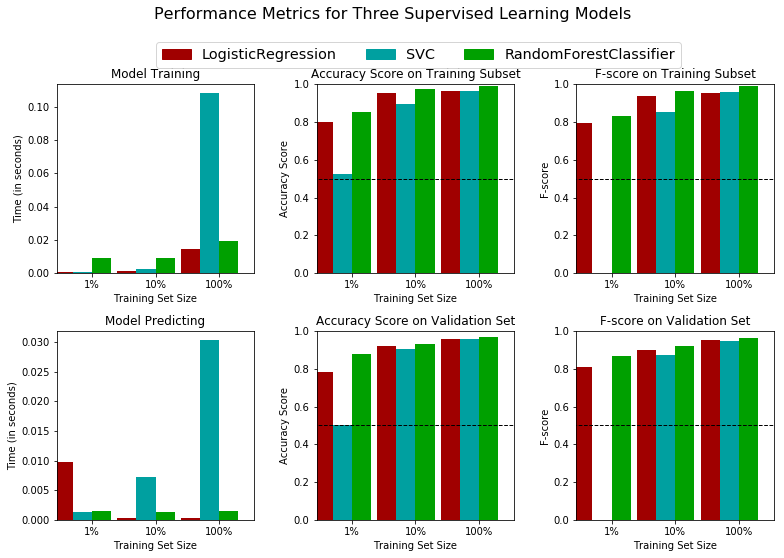

In [9]:
# TODO：从sklearn中导入三个监督学习模型
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# TODO：初始化三个模型
clf_A = RandomForestClassifier(n_estimators=3,random_state=10)
clf_B = SVC(random_state=8)
clf_C = LogisticRegression(random_state=10)

# TODO：计算1%， 10%， 100%的训练数据分别对应多少点
n_train_records = y_train.shape[0]
samples_1 = int(0.01 * n_train_records)
samples_10 = int(0.1 * n_train_records)
samples_100 = int( 1 * n_train_records)

# 收集学习器的结果
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = train_predict(clf, samples, X_train, y_train, X_val, y_val)

# 对选择的三个模型得到的评价结果进行可视化
vs.evaluate(results, 0.5, 0.5)

----
## 4.3 提高效果

选择表现最好的随机森林模型来提高效果。使用网格搜索来至少调整模型的重要参数。接下来的代码单元中实现以下功能：

- 导入`sklearn.model_selection.GridSearchCV` 和 `sklearn.metrics.make_scorer`.
- 初始化选择的分类器，并将其存储在`clf`中。
 - 设置`random_state`。
- 创建一个对于这个模型你希望调整参数的字典。
 - 例如: parameters = {'parameter' : [list of values]}。
- 使用`make_scorer`来创建一个`fbeta_score`评分对象（设置$\beta = 0.5$）。
- 在分类器clf上用'scorer'作为评价函数运行网格搜索，并将结果存储在grid_obj中。
- 用训练集（X_train, y_train）训练grid search object,并将结果存储在`grid_fit`中。

In [10]:
# TODO：导入'GridSearchCV', 'make_scorer'和其他一些需要的库
# import sklearn.model_selection.GridSearchCV, KFold

# import sklearn.metrics.make_scorer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# TODO：初始化分类器
clf = RandomForestClassifier(random_state=10)

# TODO：创建你希望调节的参数列表
parameters = {'n_estimators': range(5, 40)}

# TODO：创建一个fbeta_score打分对象
scorer  = make_scorer(fbeta_score, beta=0.5)

# TODO：在分类器上使用网格搜索，使用'scorer'作为评价函数

kfold = KFold(n_splits=10)
grid_obj = GridSearchCV(clf, parameters, scorer, cv=kfold)

# TODO：用训练数据拟合网格搜索对象并找到最佳参数
grid_obj.fit(X_train, y_train)
# 得到estimator
best_clf = grid_obj.best_estimator_

# 使用没有调优的模型做预测
predictions = clf_A.predict(X_val)
best_predictions = best_clf.predict(X_val)


# 汇报调参前和调参后的分数
print "Unoptimized model\n------"
print "Accuracy score on validation data: {:.4f}".format(accuracy_score(y_val, predictions))
print "F-score on validation data: {:.4f}".format(fbeta_score(y_val, predictions, beta = 0.5))
print "\nOptimized Model\n------"
print "Final accuracy score on the validation data: {:.4f}".format(accuracy_score(y_val, best_predictions))
print "Final F-score on the validation data: {:.4f}".format(fbeta_score(y_val, best_predictions, beta = 0.5))

Unoptimized model
------
Accuracy score on validation data: 0.9704
F-score on validation data: 0.9650

Optimized Model
------
Final accuracy score on the validation data: 0.9822
Final F-score on the validation data: 0.9811


----
## 特征的重要性

### 练习 - 提取特征重要性

在下面的代码单元中，使用表现最好的随机森林模型来分析各个特征的重要程度。

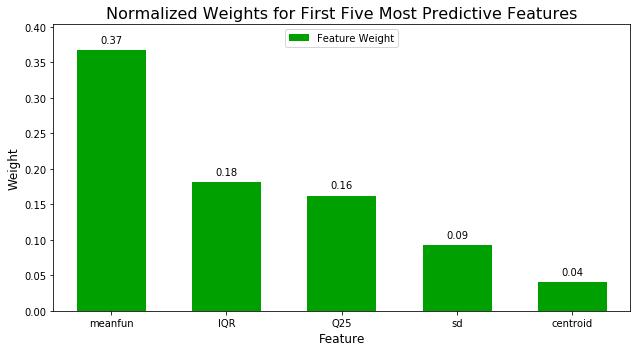

In [14]:
# TODO：导入一个有'feature_importances_'的监督学习模型
from sklearn.ensemble import RandomForestClassifier
# TODO：在训练集上训练一个监督学习模型
model = RandomForestClassifier(n_estimators=10,random_state=10)
model.fit(X_train, y_train)
# TODO： 提取特征重要性
importances = model.feature_importances_

# 绘图
vs.feature_plot(importances, X_train, y_train)

### 在测试集上测试你的模型

下面的代码实现评估模型在测试集的表现。

In [15]:
#TODO test your model on testing data and report accuracy and F score
test_predictions = best_clf.predict(X_test)
test_acc = accuracy_score(y_test, test_predictions)

test_f_score = fbeta_score(y_test, test_predictions, average='macro',beta=0.5)

print "accuracy: %f" % (test_acc)
print "fscore: %f" % (test_f_score)

accuracy: 0.981073
fscore: 0.981109
